## **Notebook PC#04 (Part A)**
## Default MLP classifier for the MNIST and CIFAR-10 databases.
**Professor:** Fernando J. Von Zuben <br>
**Aluno(a):** Beatriz Akiria de Assis Quaresma - 203899 <br>
**Aluno(a):** Decio Miranda Filho - 236087

##Training an MLP for the MNIST database

In [ ]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.25),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=5)
model.summary()
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = model.evaluate(x_test, y_test)
print("test loss, test acc:", results)

11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/5
1875/1875 [==============================] - 29s 14ms/step - loss: 0.2271 - accuracy: 0.9332
Epoch 2/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1006 - accuracy: 0.9686
Epoch 3/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0740 - accuracy: 0.9765
Epoch 4/5
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0584 - accuracy: 0.9812
Epoch 5/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0483 - accuracy: 0.9845
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (32, 784)                 0         
                                                                 
 dense (Dense)               (32, 512)                 401920    
                                                                 
 dropout

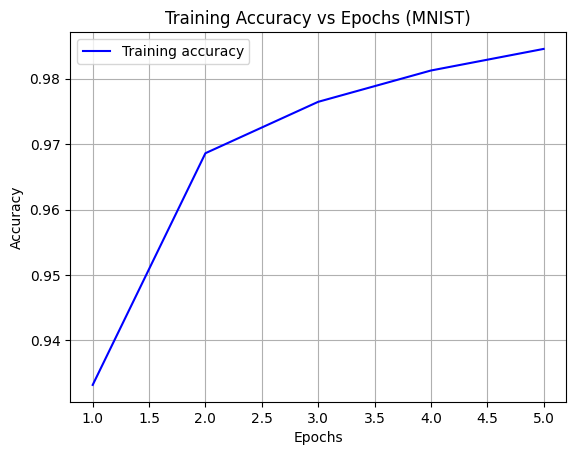

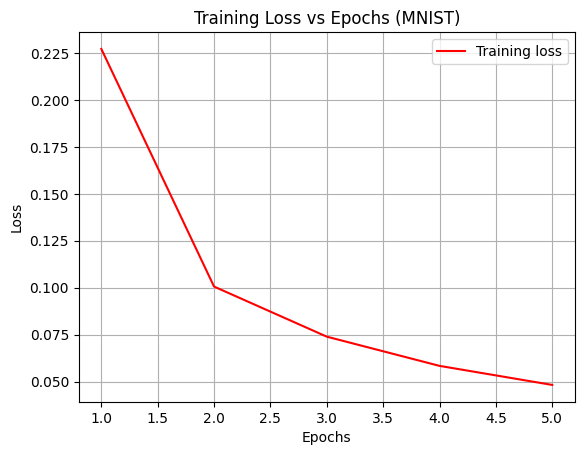

In [ ]:
# Monitoring the training evolution along epochs

import matplotlib.pyplot as plt

acc = history.history['accuracy']
loss = history.history['loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training Accuracy vs Epochs (MNIST)')
plt.legend()
plt.grid()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.title('Training Loss vs Epochs (MNIST)')
plt.legend()
plt.grid()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

In [ ]:
# Saving the model to disk

import os

model_json = model.to_json()
json_file = open("model_MLP_MNIST.json", "w")
json_file.write(model_json)
json_file.close()
model.save_weights("model_MLP_MNIST.h5")
print("Model saved to disk")
os.getcwd()

Model saved to disk


'/content'

##Training an MLP for the CIFAR-10 database

In [ ]:
cifar10 = tf.keras.datasets.cifar10

(x_train, y_train),(x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

model1 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1024, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.25),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history1 = model1.fit(x_train, y_train, epochs=10)
model1.summary()
# Evaluate the model on the test data
print("Evaluate on test data")
results = model1.evaluate(x_test, y_test)
print("test loss, test acc:", results)

170498071/170498071 [==============================] - 3s 0us/step
Epoch 1/10
1563/1563 [==============================] - 79s 50ms/step - loss: 1.9696 - accuracy: 0.2920
Epoch 2/10
1563/1563 [==============================] - 74s 48ms/step - loss: 1.8274 - accuracy: 0.3369
Epoch 3/10
1563/1563 [==============================] - 70s 44ms/step - loss: 1.7913 - accuracy: 0.3535
Epoch 4/10
1563/1563 [==============================] - 82s 53ms/step - loss: 1.7650 - accuracy: 0.3620
Epoch 5/10
1563/1563 [==============================] - 80s 51ms/step - loss: 1.7414 - accuracy: 0.3701
Epoch 6/10
1563/1563 [==============================] - 78s 50ms/step - loss: 1.7309 - accuracy: 0.3751
Epoch 7/10
1563/1563 [==============================] - 77s 49ms/step - loss: 1.7208 - accuracy: 0.3802
Epoch 8/10
1563/1563 [==============================] - 79s 51ms/step - loss: 1.7103 - accuracy: 0.3832
Epoch 9/10
1563/1563 [==============================] - 78s 50ms/step - loss: 1.7010 - accuracy: 0.38

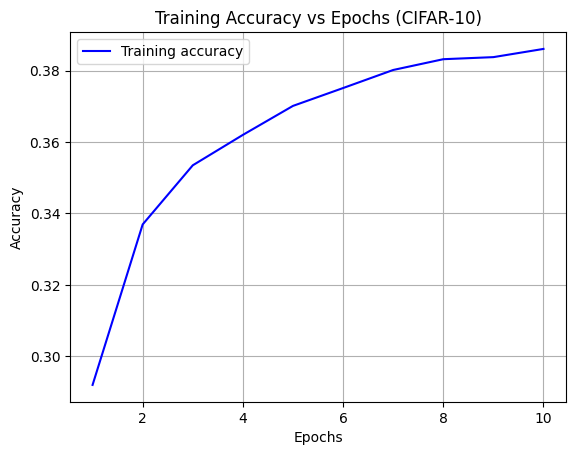

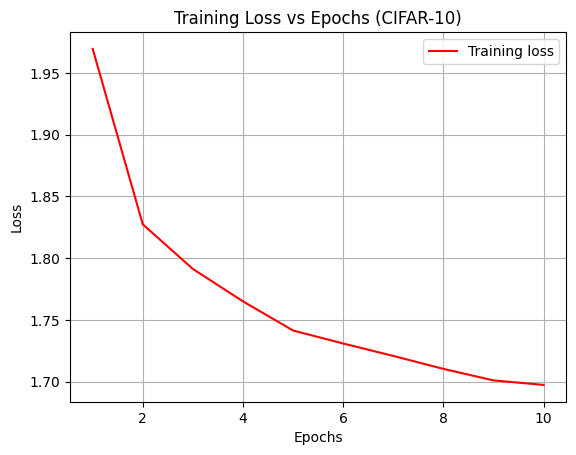

In [ ]:
# Monitoring the training evolution along epochs

import matplotlib.pyplot as plt

acc = history1.history['accuracy']
loss = history1.history['loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training Accuracy vs Epochs (CIFAR-10)')
plt.legend()
plt.grid()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.title('Training Loss vs Epochs (CIFAR-10)')
plt.legend()
plt.grid()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

In [ ]:
# Saving the model to disk

import os

model_json = model1.to_json()
json_file = open("model_MLP_CIFAR10.json", "w")
json_file.write(model_json)
json_file.close()
model.save_weights("model_MLP_CIFAR10.h5")
print("Model saved to disk")
os.getcwd()

Model saved to disk


'/content'

**Análise:**

Para a MNIST conseguiu-se uma boa acurácia no conjunto de treinamento com os hiperparâmetros definidos como: n_neurons=512, n_layers=1, dropout=0.25, optimizer='adam' e epochs=5. Para a CIFAR10, em contrapartida, a acurácia está baixa, com os hiperparâmetros definidos como: n_neurons=1024, n_layers=1, dropout=0.25, optimizer='adam' e epochs=10.